<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Vision_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pretrain Transformer Learning**

In [ ]:
pip install scikit-plot

In [ ]:
import random
import os
import glob
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, top_k_accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc

In [ ]:
class hy_pa():
  epochs = 20
  batch_size = 32
  seed = 42
  tf_seed = 768
  height = 224
  width = 224
  channel = 3
  img_size = (224, 224, 3)

In [ ]:
data_dir = "/content/brain_tumor/"
os.listdir(data_dir)

['Neurocitoma T1C+',
 'Ganglioglioma T1',
 'Glioblastoma T1',
 'Meningioma T2',
 'Ependimoma T2',
 'Meningioma T1',
 'Papiloma T1C+',
 'Glioblastoma T1C+',
 '_NORMAL T2',
 'Papiloma T1',
 'Schwannoma T1C+',
 'Germinoma T1',
 'Germinoma T1C+',
 'Papiloma T2',
 'Carcinoma T1C+',
 'Oligodendroglioma T1',
 'Astrocitoma T2',
 'Schwannoma T2',
 'Ganglioglioma T2',
 'Tuberculoma T1',
 'Ependimoma T1',
 'Neurocitoma T1',
 '_NORMAL T1',
 'Ganglioglioma T1C+',
 'Astrocitoma T1',
 'Tuberculoma T2',
 'Ependimoma T1C+',
 'Meduloblastoma T2',
 'Meduloblastoma T1C+',
 'Tuberculoma T1C+',
 'Carcinoma T1',
 'Germinoma T2',
 'Astrocitoma T1C+',
 'Neurocitoma T2',
 'Schwannoma T1',
 'Meningioma T1C+',
 'Carcinoma T2',
 'Glioblastoma T2',
 'Meduloblastoma T1',
 'Oligodendroglioma T1C+',
 'Granuloma T1C+',
 'Granuloma T2',
 'Granuloma T1',
 'Oligodendroglioma T2']

In [ ]:
data_img = glob.glob(f"{data_dir}**/*.jpg")

In [ ]:
data_img[0]

'/content/brain_tumor/Neurocitoma T1C+/2022-06-06 10_09_11-Window.jpg'

In [ ]:
data_img[0].split("/")[-2]

'Neurocitoma T1C+'

In [ ]:
total_img = len(data_img)
print(total_img)

1253


In [ ]:
def generate_labels(img_path):
  return [x.split("/")[-2:][0] for x in img_path]


def build_df(img_path, labels):
  df = pd.DataFrame({
          "image_path" : img_path,
          "label" : generate_labels(labels)
          })

  return df.sample(frac=1, random_state= hy_pa.seed).reset_index(drop=True)

In [ ]:
dataset = build_df(data_img, generate_labels(data_img))

In [ ]:
dataset.head()

image_path             label
0  /content/brain_tumor/Neurocitoma T1/2022-06-06...    Neurocitoma T1
1  /content/brain_tumor/Glioblastoma T2/2022-06-1...   Glioblastoma T2
2  /content/brain_tumor/Meningioma T1C+/2022-05-3...   Meningioma T1C+
3  /content/brain_tumor/Astrocitoma T1C+/0189d50c...  Astrocitoma T1C+
4  /content/brain_tumor/Meningioma T1C+/2022-05-3...   Meningioma T1C+

In [ ]:
lab_encoder = LabelEncoder()
dataset["label_encoder"] = lab_encoder.fit_transform(dataset.label)

In [ ]:
dataset.head()

image_path             label  \
0  /content/brain_tumor/Neurocitoma T1/2022-06-06...    Neurocitoma T1   
1  /content/brain_tumor/Glioblastoma T2/2022-06-1...   Glioblastoma T2   
2  /content/brain_tumor/Meningioma T1C+/2022-05-3...   Meningioma T1C+   
3  /content/brain_tumor/Astrocitoma T1C+/0189d50c...  Astrocitoma T1C+   
4  /content/brain_tumor/Meningioma T1C+/2022-05-3...   Meningioma T1C+   

   label_encoder  
0             26  
1             17  
2             24  
3              1  
4             24

In [ ]:
dataset.label.value_counts()

Meningioma T1C+        218
Meningioma T2          134
Meningioma T1          131
Papiloma T1C+           79
Neurocitoma T1C+        76
_NORMAL T1              71
Astrocitoma T1          48
Astrocitoma T1C+        47
Astrocitoma T2          40
Neurocitoma T1          39
Papiloma T1             38
Schwannoma T1C+         36
Schwannoma T2           33
Schwannoma T1           31
Ependimoma T2           20
_NORMAL T2              18
Papiloma T2             16
Germinoma T2            15
Neurocitoma T2          14
Ependimoma T1C+         14
Ganglioglioma T2        13
Ganglioglioma T1        13
Meduloblastoma T2       12
Ganglioglioma T1C+      12
Germinoma T1             9
Germinoma T1C+           9
Carcinoma T2             9
Carcinoma T1C+           9
Meduloblastoma T1C+      8
Glioblastoma T1C+        6
Granuloma T1C+           5
Carcinoma T1             5
Glioblastoma T2          5
Glioblastoma T1          4
Ependimoma T1            4
Granuloma T2             3
Tuberculoma T2           3
T

In [ ]:
lab_encoder.classes_

array(['Astrocitoma T1', 'Astrocitoma T1C+', 'Astrocitoma T2',
       'Carcinoma T1', 'Carcinoma T1C+', 'Carcinoma T2', 'Ependimoma T1',
       'Ependimoma T1C+', 'Ependimoma T2', 'Ganglioglioma T1',
       'Ganglioglioma T1C+', 'Ganglioglioma T2', 'Germinoma T1',
       'Germinoma T1C+', 'Germinoma T2', 'Glioblastoma T1',
       'Glioblastoma T1C+', 'Glioblastoma T2', 'Granuloma T1',
       'Granuloma T1C+', 'Granuloma T2', 'Meduloblastoma T1C+',
       'Meduloblastoma T2', 'Meningioma T1', 'Meningioma T1C+',
       'Meningioma T2', 'Neurocitoma T1', 'Neurocitoma T1C+',
       'Neurocitoma T2', 'Papiloma T1', 'Papiloma T1C+', 'Papiloma T2',
       'Schwannoma T1', 'Schwannoma T1C+', 'Schwannoma T2',
       'Tuberculoma T1C+', 'Tuberculoma T2', '_NORMAL T1', '_NORMAL T2'],
      dtype=object)

In [ ]:
num_classes = len(lab_encoder.classes_)
classes = lab_encoder.classes_

In [ ]:
def read_img(img_path):
  image = tf.io.read_file(img_path)
  image = tf.io.decode_jpeg(image, channels = 3)
  image = tf.image.resize(image, [hy_pa.height, hy_pa.width], method = tf.image.ResizeMethod.LANCZOS3)
  image = tf.cast(image, tf.float32) / 255.0
  return image

In [ ]:
def view_sample(image, label, cmap = "gray"):
  plt.figure(figsize=(10,10))
  plt.imshow(tf.image.rgb_to_grayscale(image), cmap = cmap)
  plt.title(f"Label is :: {label}", fontsize = 16)
  plt.show()

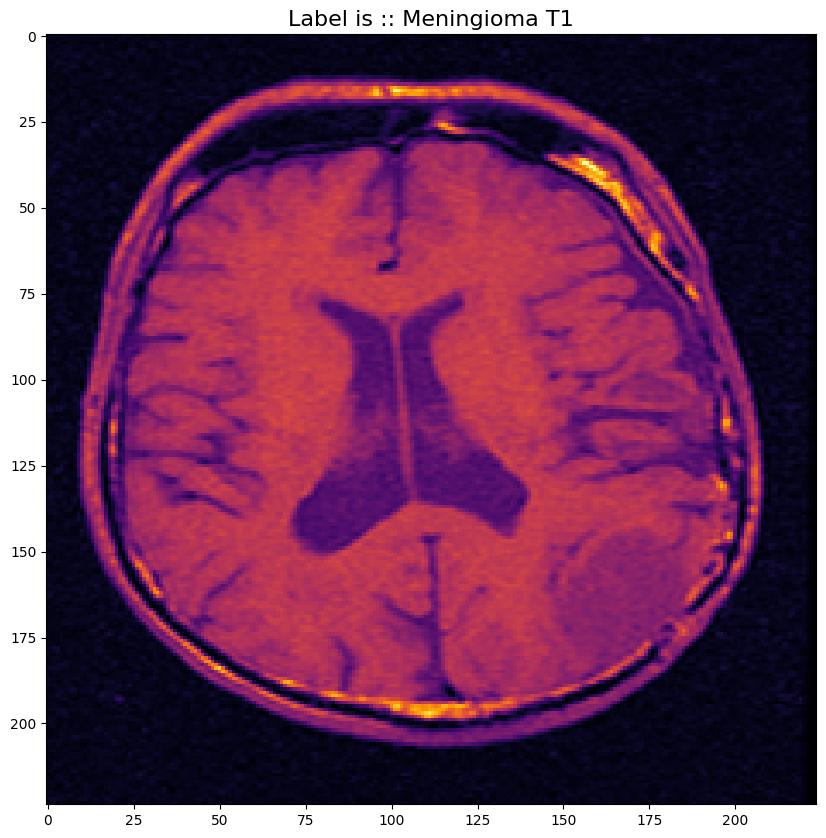

In [ ]:
idx = random.sample(dataset.index.tolist(), 1)[0]

sample_img, sample_labs = read_img(dataset.image_path[idx]), dataset.label[idx]
view_sample(sample_img, sample_labs, cmap = "inferno")

In [ ]:
def view_mulitiple_samples(df, sample_loader, count=10, color_map='gray', fig_size=(14, 10)):
    rows = count//5
    if count%5 > 0:
        rows +=1

    idx = random.sample(df.index.to_list(), count)
    fig = plt.figure(figsize=fig_size)

    for column, _ in enumerate(idx):
        plt.subplot(rows, 5, column+1)
        plt.title(f'Label: {df.label[_]}')
        plt.imshow(tf.image.rgb_to_grayscale(sample_loader(df.image_path[_])), cmap=color_map);

    plt.show()

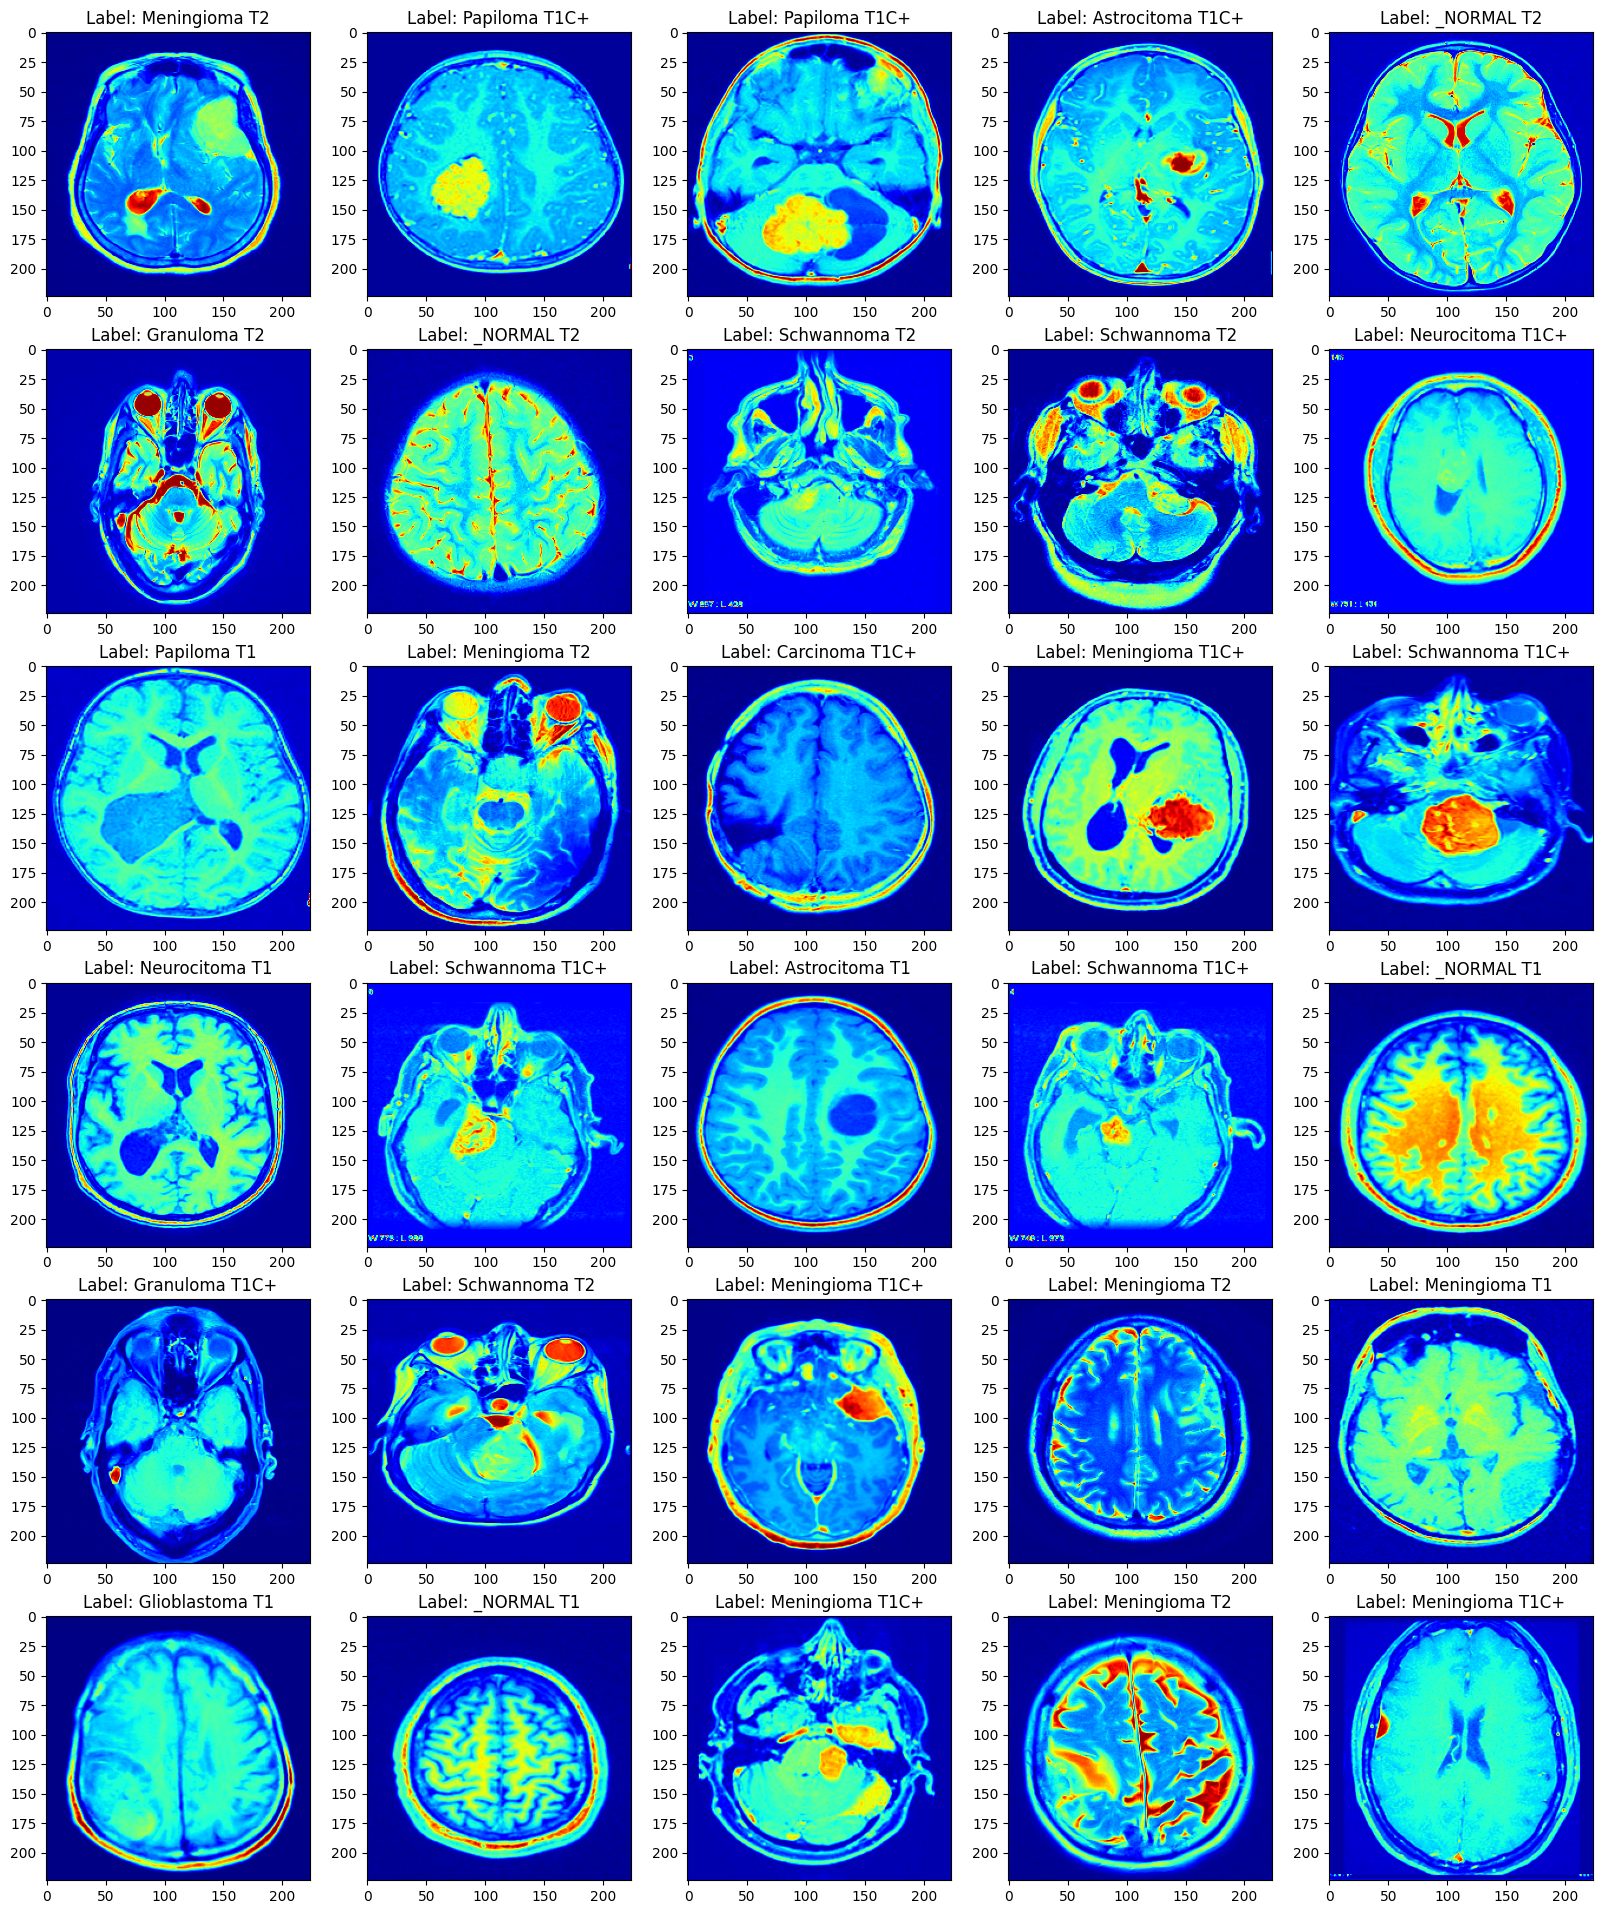

In [ ]:
view_mulitiple_samples(dataset, read_img,
                       count=30, color_map='jet',
                       fig_size=(20, 24))

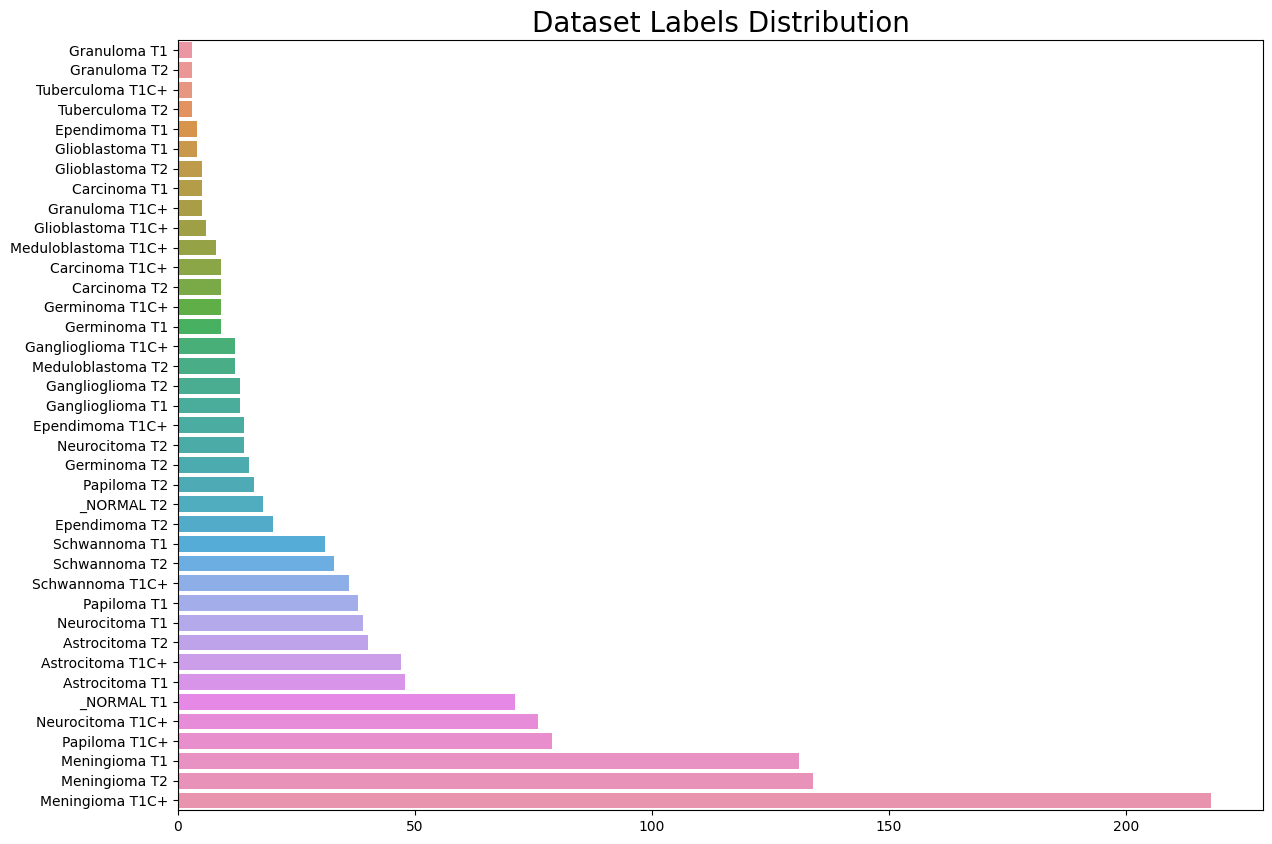

In [ ]:
fig = plt.figure(figsize=(14, 10))

# Plot Labels Distribution
plt.title('Dataset Labels Distribution', fontsize=20)
distribution = dataset['label'].value_counts().sort_values()
sns.barplot(x=distribution.values,
            y=list(distribution.keys()),
            orient="h");

In [ ]:
insufficient_labels = list(distribution[distribution.values < 10].keys())

# Get insufficient labels indices from df
insufficient_indices = pd.concat([dataset[dataset.label == x] for x in insufficient_labels]).index

# Remove insufficient labels
dataset = dataset.drop(insufficient_indices).reset_index(drop=True)

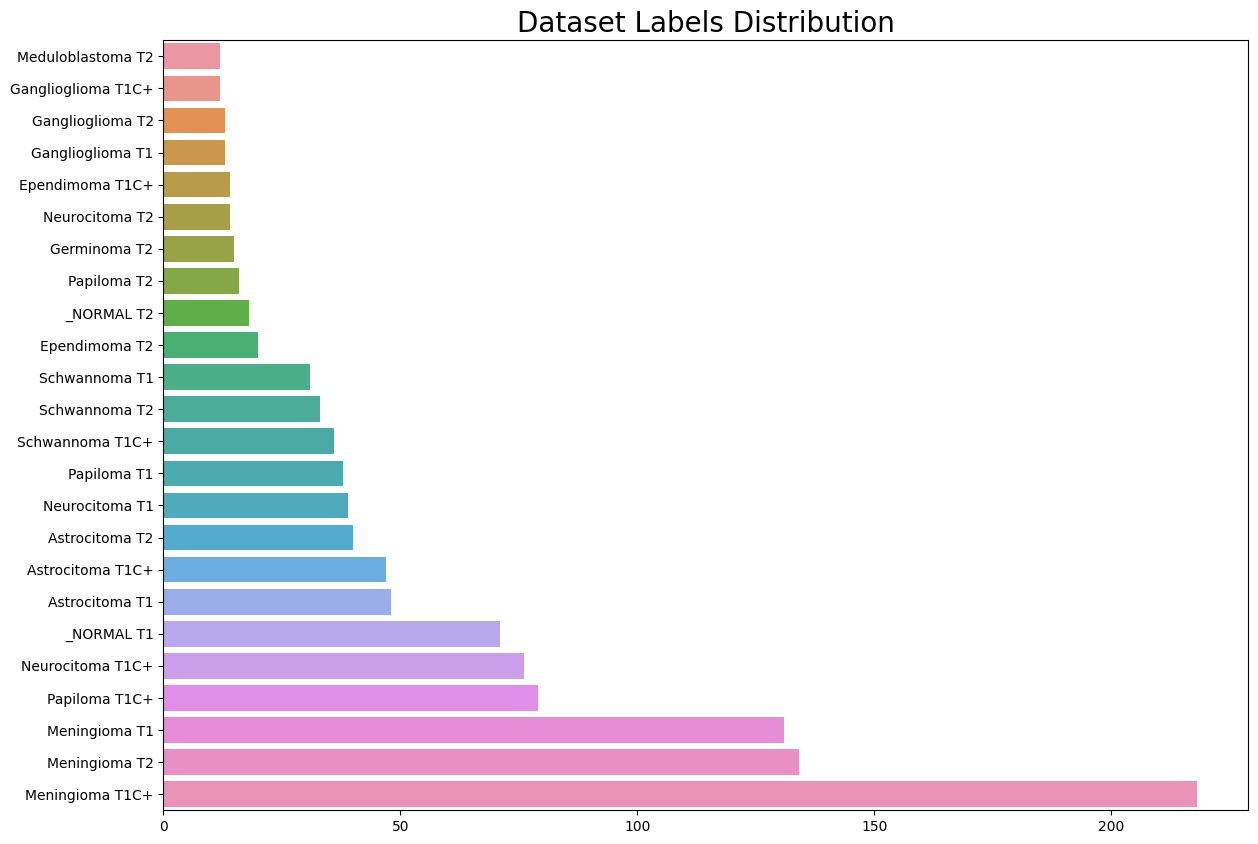

In [ ]:
fig = plt.figure(figsize=(14, 10))

# Plot Labels Distribution
plt.title('Dataset Labels Distribution', fontsize=20)
distribution = dataset['label'].value_counts().sort_values()
sns.barplot(x=distribution.values,
            y=list(distribution.keys()),
            orient="h");

In [ ]:
label_encoder = LabelEncoder()
dataset["label_encoder"] = label_encoder.fit_transform(dataset.label)

In [ ]:
dataset.head()

image_path             label  \
0  /content/brain_tumor/Neurocitoma T1/2022-06-06...    Neurocitoma T1   
1  /content/brain_tumor/Meningioma T1C+/2022-05-3...   Meningioma T1C+   
2  /content/brain_tumor/Astrocitoma T1C+/0189d50c...  Astrocitoma T1C+   
3  /content/brain_tumor/Meningioma T1C+/2022-05-3...   Meningioma T1C+   
4  /content/brain_tumor/Meningioma T1C+/2022-05-3...   Meningioma T1C+   

   label_encoder  
0             13  
1             11  
2              1  
3             11  
4             11

In [ ]:
num_classes = len(label_encoder.classes_)
classes = label_encoder.classes_

print(num_classes)
print(classes)

24
['Astrocitoma T1' 'Astrocitoma T1C+' 'Astrocitoma T2' 'Ependimoma T1C+'
 'Ependimoma T2' 'Ganglioglioma T1' 'Ganglioglioma T1C+'
 'Ganglioglioma T2' 'Germinoma T2' 'Meduloblastoma T2' 'Meningioma T1'
 'Meningioma T1C+' 'Meningioma T2' 'Neurocitoma T1' 'Neurocitoma T1C+'
 'Neurocitoma T2' 'Papiloma T1' 'Papiloma T1C+' 'Papiloma T2'
 'Schwannoma T1' 'Schwannoma T1C+' 'Schwannoma T2' '_NORMAL T1'
 '_NORMAL T2']


In [ ]:
train_split, val_test_split, _, _ = train_test_split(dataset.index, dataset.label_encoder, test_size=0.4, stratify = dataset.label_encoder, random_state = hy_pa.seed)

In [ ]:
train_data = dataset.iloc[train_split].reset_index(drop = True)
val_test_data = dataset.iloc[val_test_split].reset_index(drop = True)

train_data.shape, val_test_data.shape

((700, 3), (468, 3))

In [ ]:
val_split, test_split, _, _ = train_test_split(val_test_data.index, val_test_data.label_encoder, test_size=0.6, stratify = val_test_data.label_encoder, random_state = hy_pa.seed)

In [ ]:
val_data = dataset.iloc[val_split].reset_index(drop = True)
test_data = dataset.iloc[test_split].reset_index(drop = True)

val_data.shape, test_data.shape

((187, 3), (281, 3))

In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", seed = hy_pa.tf_seed),
    layers.RandomZoom(height_factor = (-0.1, 0.1), width_factor = (-0.1, 0.1), seed = hy_pa.tf_seed)
  ], name = "Augmentation")

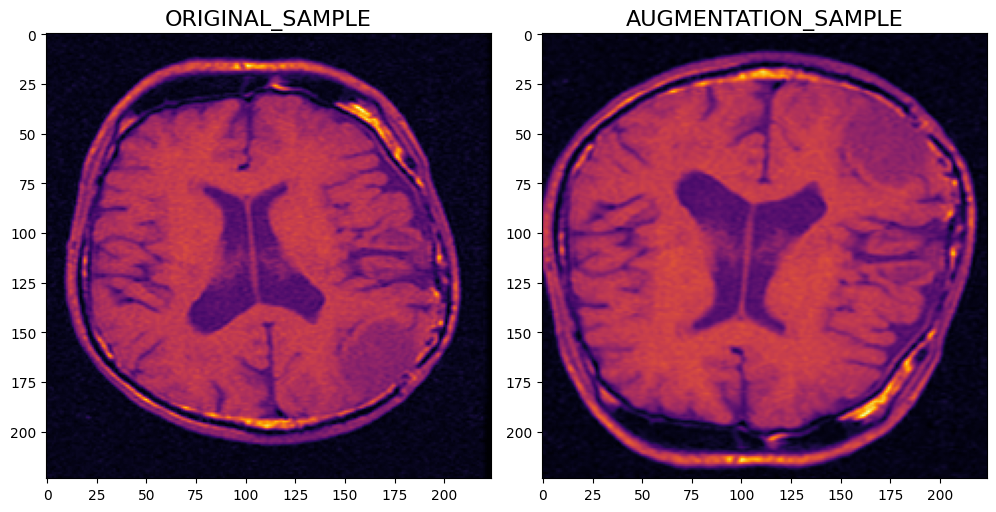

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
fig.tight_layout(pad = 0.6)

ax1.set_title("ORIGINAL_SAMPLE", fontsize = 16)
ax1.imshow(tf.image.rgb_to_grayscale(sample_img), cmap = "inferno")


ax2.set_title("AUGMENTATION_SAMPLE", fontsize = 16)
ax2.imshow(tf.image.rgb_to_grayscale(data_augmentation(sample_img)), cmap = "inferno")

In [ ]:
val_data

image_path            label  \
0    /content/brain_tumor/Schwannoma T1/2022-06-06 ...    Schwannoma T1   
1    /content/brain_tumor/Meningioma T1/2022-05-30 ...    Meningioma T1   
2    /content/brain_tumor/Meningioma T1C+/2022-05-2...  Meningioma T1C+   
3    /content/brain_tumor/Meningioma T1/2022-05-28 ...    Meningioma T1   
4    /content/brain_tumor/Neurocitoma T1/d8c9c04a58...   Neurocitoma T1   
..                                                 ...              ...   
182  /content/brain_tumor/Meningioma T2/2022-05-30 ...    Meningioma T2   
183  /content/brain_tumor/Schwannoma T1/7d590c4f75b...    Schwannoma T1   
184  /content/brain_tumor/Schwannoma T2/2022-06-06 ...    Schwannoma T2   
185  /content/brain_tumor/_NORMAL T1/2022-06-13 09_...       _NORMAL T1   
186  /content/brain_tumor/Neurocitoma T1/7f1f183e81...   Neurocitoma T1   

     label_encoder  
0               19  
1               10  
2               11  
3               10  
4               13  
..             ...  
182             12  
183             19  
184             21  
185             22  
186             13  

[187 rows x 3 columns]

In [ ]:
def tf_encoder(labels, encoder_depth = 24):
  return tf.one_hot(labels, depth = encoder_depth).numpy()


def tf_pipeline(df, load_fn, augment = False, batch_size = 32, shuffle = False, cache = None, prefetch = False):

  img_path = df.image_path

  labels = tf_encoder(df.label_encoder)

  AUTOTUNE = tf.data.AUTOTUNE

  data = tf.data.Dataset.from_tensor_slices((img_path, labels))

  if augment:
    data = data.map(lambda x, y : (data_augmentation(load_fn(x)), y), num_parallel_calls = AUTOTUNE)
  else :
    data = data.map(lambda x, y : (load_fn(x), y), num_parallel_calls = AUTOTUNE)

  if shuffle:
    data = data.shuffle(buffer_size = 1000)

  data = data.batch(batch_size)

  if cache != None:
    data = data.cache(cache)

  if prefetch:
    data = data.prefetch(buffer_size = AUTOTUNE)

  return data

In [ ]:
train_data = tf_pipeline(train_data, read_img, augment = True, batch_size = hy_pa.batch_size, shuffle = False, prefetch = True)

val_data = tf_pipeline(val_data, read_img, batch_size = hy_pa.batch_size, shuffle = False, prefetch = False)

test_data = tf_pipeline(test_data, read_img, batch_size = hy_pa.batch_size, shuffle = False, prefetch = False)

In [ ]:
train_data, val_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24), dtype=tf.float32, name=None))>)

# **Transfer Learning Model: EfficientNet V2 B0**


EfficientNetV2 is a convolutional neural network that has faster training speed and better parameter efficiency than previous EfficientNetV1 models. To develop these models, the authors use a combination of training-aware neural architecture search and scaling, to jointly optimize training speed. The models were searched from the search space enriched with new ops such as Fused-MBConv.

![picture]("/content/59864ee4.png")

Image Source: ["https://wandb.ai/wandb_fc/pytorch-image-models/reports/EfficientNetV2--Vmlldzo2NTkwNTQ"]

For more information follow the links below:

EfficientNet V2 Paper (2021): EfficientNetV2: Smaller Models and Faster Training

EfficientNet: Improving Accuracy and Efficiency through AutoML and Model Scaling

Wandb: EfficientNetV2

# **TensorFlow Hub**

TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.

In [ ]:
def build_hub_model(model_link, model_name, trainable = False):
  return hub.KerasLayer(model_link, trainable = trainable, name = model_name)

In [ ]:
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2"
model_name = "efficientnet_v2"
set_trainable = False

EfficientNetB0 = build_hub_model(efficientnet_url, model_name, trainable = set_trainable)

In [ ]:
def efficientnet_model():
  initializer = tf.keras.initializers.GlorotNormal(seed = hy_pa.seed)

  my_model = Sequential(
    [
      layers.Input(shape = hy_pa.img_size, dtype = tf.float32, name = "input_img"),
      EfficientNetB0,
      layers.Dropout(0.2),
      layers.Dense(512, activation = "relu", kernel_initializer = initializer),
      layers.Dense(256, activation = "relu", kernel_initializer = initializer),
      layers.Dense(24, dtype = tf.float32, activation = "softmax", kernel_initializer = initializer)
    ], name = "EfficientNetB0")
  return my_model

In [ ]:
model_E = efficientnet_model()
model_E.summary()

Model: "EfficientNetB0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet_v2 (KerasLaye  (None, 1280)              5919312   
 r)                                                              
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 24)                6168      
                                                                 
Total params: 6712680 (25.61 MB)
Trainable params: 793368 (3.03 MB)
Non-trainable params: 5919312 (22.58 MB)
_________

In [ ]:
def train_model(model, num_epochs, callbacks_list, train_data, val_data = None, shuffle = False):
  model_history = {}
  if val_data != None:
    model_history = model.fit(train_data,
                              epochs = num_epochs,
                              validation_data = val_data,
                              validation_steps = int(len(val_data)),
                              callbacks = callbacks_list,
                              shuffle = shuffle)

  if val_data == None:
    model_history = model.fit(train_data,
                              epochs = num_epochs,
                              callbacks = callbacks_list,
                              shuffle = shuffle)

  return model_history

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                 monitor = "val_loss",
                 patience = 3,
                 restore_best_weights = True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                 monitor = "val_loss",
                 patience = 2,
                 factor = 0.1,
                 verbose = 1)

callbacks = [early_stopping, reduce_lr]

metrics = ["accuracy"]

In [ ]:
tf.random.set_seed(hy_pa.seed)

model_E.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = metrics)

In [ ]:
Model_E_history = train_model(model_E, hy_pa.epochs, callbacks, train_data, val_data, shuffle = False)

Epoch 1/20
22/22 [==============================] - 23s 477ms/step - loss: 2.3642 - accuracy: 0.3686 - val_loss: 1.3271 - val_accuracy: 0.6364 - lr: 0.0010
Epoch 2/20
22/22 [==============================] - 7s 333ms/step - loss: 1.1980 - accuracy: 0.6471 - val_loss: 0.8786 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 3/20
22/22 [==============================] - 7s 314ms/step - loss: 0.8554 - accuracy: 0.7343 - val_loss: 0.6016 - val_accuracy: 0.8396 - lr: 0.0010
Epoch 4/20
22/22 [==============================] - 7s 313ms/step - loss: 0.6478 - accuracy: 0.8000 - val_loss: 0.5286 - val_accuracy: 0.8128 - lr: 0.0010
Epoch 5/20
22/22 [==============================] - 8s 364ms/step - loss: 0.5097 - accuracy: 0.8386 - val_loss: 0.4594 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 6/20
22/22 [==============================] - 9s 392ms/step - loss: 0.4547 - accuracy: 0.8571 - val_loss: 0.4023 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 7/20
22/22 [==============================] - 6s 276ms/step - l

In [ ]:
model_E_evalute = model_E.evaluate(test_data)

9/9 [==============================] - 2s 228ms/step - loss: 0.1718 - accuracy: 0.9573


In [ ]:
model_E_prob = model_E.predict(test_data, verbose = 1)
model_E_pred = tf.argmax(model_E_prob, axis = 1)

9/9 [==============================] - 2s 170ms/step


# **Transfer Learning Model: Vision Transformers**


The Vision Transformer (ViT) model was introduced in a conference research paper titled "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale," published at The International Conference on Learning Representations (ICLR) in 2021. ViTs are used in image recognition tasks such as object detection, image segementation, action recognition and image classification.

ViTs are based off transformer architectures used in Natural Language Processing (NLP) which converts texts into sequence tokens and generates text embeddings. However, with ViTs an input image is preprocessed into patches which are reminiscent of word tokens for NPL transformers. These 'patches' are used along with the transform encoder to generate image embeddings. The transformer encoder blocks consists of three components, namely:

Layer Normalization: Applied to the patches and attention for computational speedup.

Multi-head Attention: Used to generate and concatenate attention heads for all patches to capture local and global dependencies in an image.

Multi-Layer Perceptrons (MLP): Takes the attention heads and passes them through two dense layers with the Gaussian Error Linear Unit (GELU) as the activation function.

Image Source: [Source]In comparison to traditional Convolution Neural Network (CNN) Architechtures, Vision Transformers achive remarkable results while requiring less computational resources for pre-training. However, Vision Transformers exhibits weaker inductive bias which leads to an increased reliance on regularization techniques and data augmentation for smaller datasets. For this reason, CNNs generally perform better on smaller datasets while Vision Transformers excel on large datasets.

So for this section we will use the pre-trained ViT-B16 model.

For more information see the following:

Vision Transformer Paper: An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale (2021)

Attention Mechanism Paper: Attention Is All You Need (2017)

V7Labs Article: Vision Transformer: What It Is & How It Works [2023 Guide]

Viso.ai Article: Vision Transformers (ViT) in Image Recognition – 2022 Guideo

In [ ]:
! pip install -q vit-keras

In [ ]:
pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
from vit_keras import vit

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
vit_model = vit.vit_b16(image_size = 224,
                        activation = "softmax",
                        pretrained = True,
                        include_top = False,
                        pretrained_top = False,
                        classes = 2)

for layer in vit_model.layers:
  layer.trainable = False

In [ ]:
def vit_b16_model():
  initializer = tf.keras.initializers.GlorotNormal(seed = hy_pa.seed)

  base_model = Sequential(
    [
      layers.Input(shape = hy_pa.img_size, dtype = tf.float32, name = "input_image"),
      vit_model,
      layers.Dropout(0.2),
      layers.Dense(512, activation = "relu", kernel_initializer = initializer),
      layers.Dense(256, activation = "relu", kernel_initializer = initializer),
      layers.Dense(24, activation = "softmax", kernel_initializer = initializer)
   ], name = "vit_b16_model")
  return base_model

In [ ]:
model_vi = vit_b16_model()

In [ ]:
model_vi.summary()

Model: "vit_b16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 dropout_2 (Dropout)         (None, 768)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               393728    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 24)                6168      
                                                                 
Total params: 86329880 (329.32 MB)
Trainable params: 531224 (2.03 MB)
Non-trainable params: 85798656 (327.30 MB)
_________________________________________________________________


In [ ]:
tf.random.set_seed(hy_pa.seed)

model_vi.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 loss = tf.keras.losses.CategoricalCrossentropy(),
                 metrics = metrics)

In [ ]:
vit_history = train_model(model_vi, hy_pa.epochs, callbacks, train_data, val_data, shuffle = False)

Epoch 1/20
22/22 [==============================] - 33s 890ms/step - loss: 2.4345 - accuracy: 0.3200 - val_loss: 1.6801 - val_accuracy: 0.5187 - lr: 0.0010
Epoch 2/20
22/22 [==============================] - 14s 609ms/step - loss: 1.5188 - accuracy: 0.5643 - val_loss: 1.1422 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 3/20
22/22 [==============================] - 16s 740ms/step - loss: 1.0694 - accuracy: 0.6843 - val_loss: 1.0744 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 4/20
22/22 [==============================] - 16s 740ms/step - loss: 0.9226 - accuracy: 0.7114 - val_loss: 1.0353 - val_accuracy: 0.6738 - lr: 0.0010
Epoch 5/20
22/22 [==============================] - 16s 737ms/step - loss: 0.7903 - accuracy: 0.7329 - val_loss: 0.7414 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 6/20
22/22 [==============================] - 14s 622ms/step - loss: 0.7151 - accuracy: 0.7729 - val_loss: 0.6891 - val_accuracy: 0.7594 - lr: 0.0010
Epoch 7/20
22/22 [==============================] - 16s 732ms/st

In [ ]:
vit_evaluat = model_vi.evaluate(test_data)

9/9 [==============================] - 4s 429ms/step - loss: 0.4122 - accuracy: 0.9004


In [ ]:
vit_b16_prob = model_vi.predict(test_data, verbose=1)
vit_b16_pred = tf.argmax(vit_b16_prob, axis=1)

9/9 [==============================] - 34s 421ms/step


# **Ensemble via Averaging**


🤔 What is ensembling via averaging?
According to ChatGPT:
Ensembling via averaging is a type of ensemble method used in machine learning to improve the accuracy and stability of a predictive model by combining the predictions of multiple base models.

In this approach, each base model is trained on the same dataset but with different hyperparameters, algorithms, or subsets of features, in order to capture different aspects of the data and reduce the risk of overfitting. Once the base models are trained, their predictions are combined into a single prediction using some averaging technique, such as simple averaging, weighted averaging, or geometric mean.
Simple averaging involves taking the average of the predictions of all base models, without considering their individual performance or importance. Weighted averaging, on the other hand, assigns a weight to each base model's prediction based on its performance on a validation set or other criteria. The weights are typically learned using techniques such as cross-validation or grid search. Geometric mean averaging computes the geometric mean of the predictions of all base models, which can be useful when dealing with positive-valued data or when there are extreme values or outliers.

For this notebook, we'll only focus on ensembling via averaging since other ensembling methods will introduce another layer of complexity to this notebook's contents.

# **Simple Average Ensembling**

Given a data set X={x1,…,xn}�={�1,…,��}, the arithmetic mean (also mean or simple average), denoted x¯�¯ (read x bar), is the mean of the n� values x1,…,xn�1,…,��. Simple Averaging is defined by the formula:

x¯=1n(∑i=1nxi)=x1+x2+⋯+xnn�¯=1�(∑�=1���)=�1+�2+⋯+���
According to ChatGPT:

Simple average ensembling is a type of ensemble method used in machine learning to combine the predictions of multiple base models by taking the arithmetic mean of their predictions.

In this approach, each base model is trained on the same dataset but with different hyperparameters, algorithms, or subsets of features, in order to capture different aspects of the data and reduce the risk of overfitting. Once the base models are trained, their predictions are combined into a single prediction using the arithmetic mean.

The arithmetic mean is calculated by adding together the predictions of each base model and then dividing by the number of models. Simple average ensembling tends to be a straightforward and effective way to combine the predictions of multiple models, especially when the individual models have similar performance and reliability.

Simple average ensembling can be applied to a wide range of machine learning tasks and algorithms, including regression, classification, and clustering, among others. It can also be combined with other ensemble techniques, such as weighted averaging, or bagging, to further improve the performance and accuracy of the model.

Overall, simple average ensembling is a useful tool in ensemble learning that can help to improve the accuracy and robustness of the model, by reducing the variance and bias of the predictions, and by capturing a broader range of patterns and relationships in the data.

For more information see the following:

Medium | Simple Weighted Average Ensemble | Machine Learning

Wikipedia | Arithmetic Mean

In [ ]:
avg_probabilities = np.mean([
    model_E_prob,
    vit_b16_prob], axis=0)

# Compute average ensemble predictions
avg_predictions = tf.argmax(avg_probabilities, axis=1)

# **Weighted Average Ensembling**

The weighted average of a non-empty finite tuple of data (x1,x2,…,xn)(�1,�2,…,��), with corresponding non-negative weights (w1,w2,…,wn)(�1,�2,…,��) is defined as:
x¯=∑i=1nwixi∑i=1nwi�¯=∑�=1�����∑�=1���
which expands to:
x¯=w1x1+w2x2+⋯+wnxnw1+w2+⋯+wn.�¯=�1�1+�2�2+⋯+�����1+�2+⋯+��.


Note that the weights cannot be negative. However, some weights may be zero, but not all since this would result in division by zero. When the weights are normalized, meaning:


w′i=wi∑j=1nwj&∑i=1nw′i=1��′=��∑�=1���&∑�=1���′=1
then the weighted average can be expressed as a linear combination of the normalized weights and samples:


x¯=∑i=1nw′ixi�¯=∑�=1���′��

**According to ChatGPT:**

Weighted ensembling is a type of model averaging ensembling, which is a category of ensemble methods that involves combining the predictions of multiple models to improve prediction accuracy.


In weighted ensembling, each model's prediction is weighted by a certain factor or weight, which reflects the relative importance or performance of the model. The weights assigned to each model's prediction can be determined using a variety of techniques, such as cross-validation, grid search, or meta-learning.


Weighted ensembling is a flexible and powerful technique that can combine the strengths of different models and mitigate their weaknesses, leading to improved prediction accuracy and robustness. It can be applied to a wide range of machine learning tasks and algorithms, including regression, classification, and clustering, among others.


**For more information see the following:**


Machine Learning Mastery | How to Develop a Weighted Average Ensemble With Python

Wikipedia | Weighted Arithmetic Mean

In [ ]:
weights = [0.6, 0.4]
model_probabilities = [model_E_prob, vit_b16_prob]

# Compute weighted average probabilities
weighted_avg_probabilities = sum([w * p for w, p in zip(weights, model_probabilities)])

# Compute weighted average ensemble predictions
weighted_avg_predictions = tf.argmax(weighted_avg_probabilities, axis=1)

# **Geometric Mean Ensembling**

The geometric mean is a mean or average which indicates a central tendency of a finite set of positive real numbers by using the product of their values (as opposed to the arithmetic mean which uses their sum). The geometric mean is defined as the nth root of the product of n numbers, i.e., for a set of numbers a1, a2, ..., an, the geometric mean is defined as:

(∏i=1nxi)1n=x1x2⋯xn−−−−−−−−−√n(∏�=1���)1�=�1�2⋯���

We can also express the geometrics mean as the logscaled arithmetic mean:
(∏i=1nxi)1n=exp(1n∑i=1nlnai)(∏�=1���)1�=exp⁡(1�∑�=1�ln⁡��)

**According to ChatGPT:**

Geometric mean ensembling is a type of ensemble method used in machine learning to combine the predictions of multiple base models by taking the geometric mean of their predictions.

In this approach, each base model is trained on the same dataset but with different hyperparameters, algorithms, or subsets of features, in order to capture different aspects of the data and reduce the risk of overfitting. Once the base models are trained, their predictions are combined into a single prediction using the geometric mean.

The geometric mean is calculated by multiplying together the predictions of each base model and then taking the nth root of the product, where n is the number of models. The geometric mean tends to reduce the impact of extreme values or outliers in the predictions, which can help to improve the stability and robustness of the ensemble model.

Geometric mean ensembling can be applied to a wide range of machine learning tasks and algorithms, including regression, classification, and clustering, among others. It can also be combined with other ensemble techniques, such as simple averaging, weighted averaging, or bagging, to further improve the performance and accuracy of the model.

Overall, geometric mean ensembling is a powerful tool in ensemble learning that can help to capture a broader range of patterns and relationships in the data, reduce the variance and bias of the predictions, and improve the overall accuracy and robustness of the model.

**For more information see the following:**

Machine Learning Mastery | Arithmetic, Geometric, and Harmonic Means for Machine Learning

Wikipedia | Geometric Mean

In [ ]:
# List model probabilities
model_probabilities = [model_E_prob, vit_b16_prob]

# Compute geometric mean probabilities
geometric_mean_probabilities = np.power(np.multiply(model_probabilities[0],
                                                    model_probabilities[1]),
                                        1/len(model_probabilities))

# Compute weighted average ensemble predictions
geometric_mean_predictions = tf.argmax(geometric_mean_probabilities, axis=1)


In this notebook the usage of Transfer Learning models such EfficientNet V2 B0, ViT-B16 and ensembling methods were explored in order to solve the task of classifying multiple brain tumors in patients. The use EfficientNet V2 B0 and ViT-B16 via Geometric Mean Ensembling was shown to outperform all other methods covered in this notebook.

Regarding the inference-performance trade-offs, we observe that Geometric Mean Ensemble is the best choice as it outperforms all other models on the trade-off between inference time and performance as it achieves the highest Matthews Correlation Coefficient (MCC). This means that this Ensemble will generalise to unseen samples since a high MCC implies that model's predictions are statistically of high quality.

However, since the task is to classify multiple brain tumors it should be noted that a model trained to solve this problem should be trained on a significant number of samples and achieve a high accuracy score and MCC (very close to 100% and 1.0 respectively) as misclassification may result in a fatal outcome. A model for this task must achieve state-of-the-art (SOTA) performance if it is to be used in production as it will influence the decisions made by health professionals who diagnose brain tumors in patients.

**Improving model performance**

The models explored in this notebook still have room for improvement. The following should be considered:

Increasing the width and depth of the classification head: Using more dense layers along with more units may result in improved performance, but may also hinder the inference rate.

Using Fine-Tuning techniques: Fine-Tuning was not applied in this notebook to prevent adding to the complexity of the notebook. Applying fine-tuning methods may result in improved performance whilst maintaining similar inference rates. Note that this may require more computational resources and in the case of the Vision Transformer - lots of DATA as well!

Using Other Ensembling methods: Ensembling via Averaging was explored in this notebook and proved to be a powerful technique which allows for the pooling of knowledge from various models all trained to solve the same problem (much like transfer learning). Improved results may be achived through ensembling techniques (such as blending, stacking or voting) at the expense of higher a inference rate.

Gather More Data: The number of samples present in this dataset is insufficient since the structural information present which a model can learn is limited. By providing more data we will not only be able to build a model that can generalise better to unseen data, but with an influx of learnable structural information we'll be able to train a model that is robust to outliers, hence reducing the risk of misclassification. We'll also be able to apply fine-tuning techinique to vision transformer based models.